In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("survey_results_public.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [12]:
df1 = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]

In [13]:
df1.head()

,Country,EdLevel,YearsCodePro,Employment,ConvertedCompYearly
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [15]:
df1["EdLevel"].unique()

array([nan, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [16]:
df1 = df1.rename({"ConvertedCompYearly":"Salary"},axis = 1)
df1.head(2)

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0


In [18]:
df1 = df1[df1["Salary"].notnull()]
df1.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [20]:
df1 = df1.dropna()
df1.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [23]:
df1.Employment.unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'Retired',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Retired',
       'I prefer not to say',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, full-time;Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [24]:
df1 = df1[df1["Employment"] == 'Employed, full-time']

In [26]:
df1 = df1.drop("Employment",axis = 1)
df1.head()

,Country,EdLevel,YearsCodePro,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,3,135000.0


In [30]:
df['Country'].value_counts()

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Saint Kitts and Nevis                                       1
Marshall Islands                                            1
Samoa                                                       1
Central African Republic                                    1
San Marino                                                  1
Name: count, Length: 185, dtype: int64

In [31]:
def shorten_categories(categories,cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map
            

In [32]:
country_map = shorten_categories(df1.Country.value_counts(), 400)
df1['Country'] = df1['Country'].map(country_map)
df1.Country.value_counts()

Country
United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


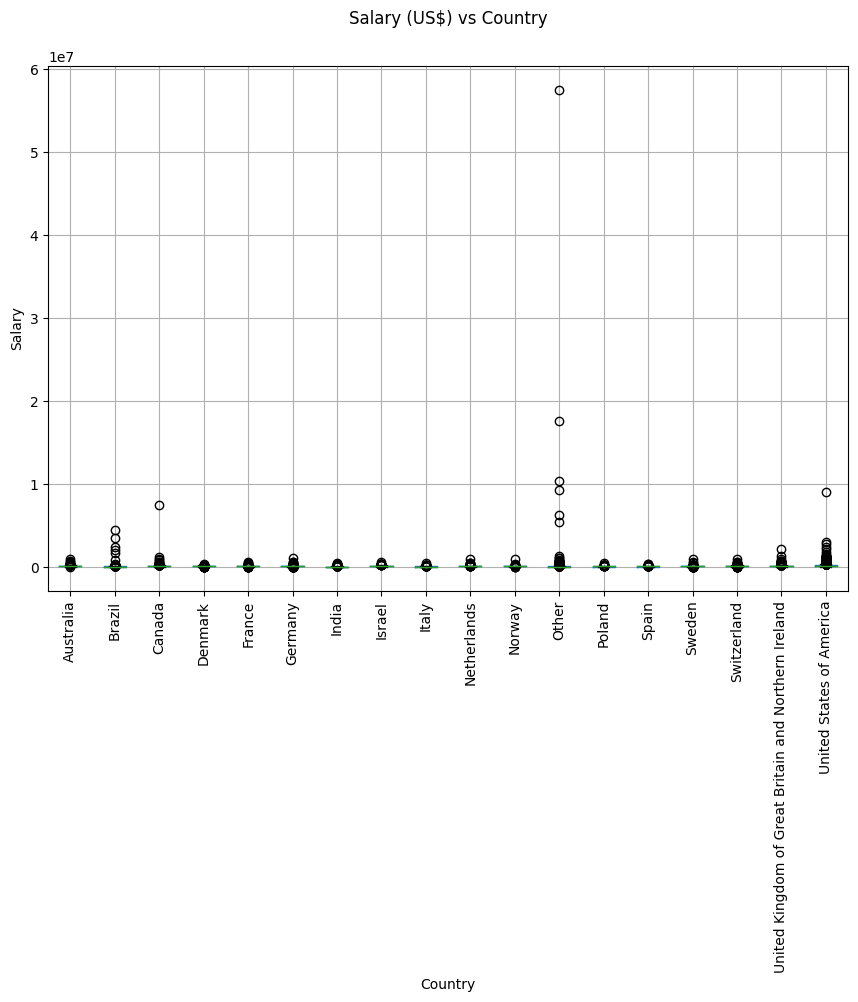

In [36]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
df1.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [46]:
df1['Salary'].mean()

98422.52276848422

In [47]:
df1 = df1[df1["Salary"] <= 250000]
df1 = df1[df1["Salary"] >= 10000]
df1 = df1[df1['Country'] != 'Other']

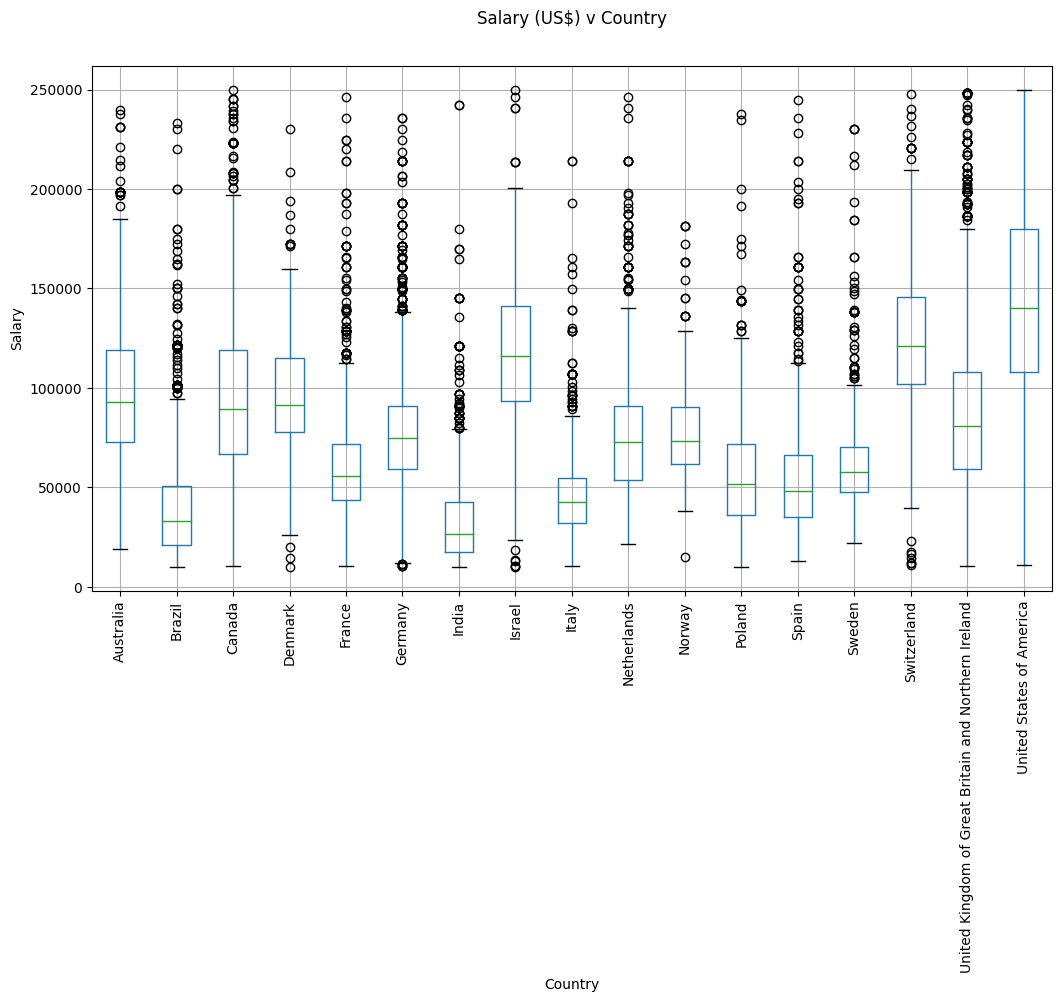

In [49]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df1.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [50]:
df1.columns

Index(['Country', 'EdLevel', 'YearsCodePro', 'Salary'], dtype='object')

In [51]:
df1['YearsCodePro'].unique()

array(['23', '7', '21', '3', '9', 'Less than 1 year', '10', '2', '6',
       '14', '5', '15', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '8', '18', '30', '27', '17', '43', '38', '33', '29', '22',
       '1', '11', '34', '42', '26', '31', '36', '39', '40', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [52]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df1['YearsCodePro'] = df1['YearsCodePro'].apply(clean_experience)

In [53]:
df1["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [54]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df1['EdLevel'] = df1['EdLevel'].apply(clean_education)

In [55]:
df1['EdLevel'].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df1['EdLevel'] = le_education.fit_transform(df1['EdLevel'])
df1["EdLevel"].unique()

array([0, 1, 2, 3])

In [58]:
le_education.classes_

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [59]:
le_country = LabelEncoder()
df1['Country'] = le_country.fit_transform(df1['Country'])
df1['Country'].unique()

array([16, 15,  0,  9,  5, 13,  4, 12,  1,  8,  2, 14,  6, 10,  3,  7, 11])

In [60]:
le_country.classes_

array(['Australia', 'Brazil', 'Canada', 'Denmark', 'France', 'Germany',
       'India', 'Israel', 'Italy', 'Netherlands', 'Norway', 'Poland',
       'Spain', 'Sweden', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'], dtype=object)

In [61]:
X = df1.drop("Salary",axis = 1)
y = df1.Salary

In [62]:
X.shape

(27716, 3)

In [64]:
y.values

array([250000., 156000.,  96828., ...,  50719.,  15752.,  64254.])

In [65]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [66]:
y_pred = linear_reg.predict(X)

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
error

46082.71046497013

In [68]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [69]:
y_pred = dec_tree_reg.predict(X)

In [70]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,748.85


In [71]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [72]:
y_pred = random_forest_reg.predict(X)

In [73]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,818.22


In [74]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [75]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,647.64


In [76]:
regressor = gs.best_estimator_

In [77]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=10, random_state=0)

In [79]:
max_depth = [None, 2,4,6,8,10,12]
n_estimators = [10,20,30,40,50,60,70,80,90,100]
parameters = {"max_depth": max_depth,"n_estimators":n_estimators}

regressor = RandomForestRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='neg_mean_squared_error')

In [80]:
gs.best_estimator_

RandomForestRegressor(max_depth=10, random_state=0)

In [81]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,506.88


In [84]:
# country, edlevel, yearscode
X = np.array([["India", 'Master’s degree', 15 ]])
X

array([['India', 'Master’s degree', '15']], dtype='<U15')

In [85]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X


array([[ 6.,  2., 15.]])

In [86]:
y_pred = dec_tree_reg.predict(X)
y_pred

C:\Users\Priyanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([36396.125])

In [87]:
y_pred = regressor.predict(X)
y_pred

C:\Users\Priyanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([50844.03911289])

In [88]:
y_pred = random_forest_reg.predict(X)
y_pred

C:\Users\Priyanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([34896.89782198])

In [89]:
import pickle

In [90]:
data = {"model": dec_tree_reg, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [91]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [92]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\Priyanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([36396.125])